In [1]:
#### Runs with new function #### :)
%matplotlib inline
import sys
import random
import xarray as xr
import numpy as np
import os
import yaml
import math
from datetime import datetime, timedelta
from parcels import FieldSet, Field, VectorField, ParticleSet, JITParticle, ParcelsRandom, Variable, Kernel, AdvectionRK4

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from cartopy import crs, feature
import zarr 
from mpl_toolkits.basemap import Basemap
from matplotlib.transforms import Affine2D


sys.path.append('/ocean/vvalenzuela/MOAD/Ocean_Parcels')

from OP_functions import *
import cmocean
cmap = cmocean.cm.deep

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
def plot_nice_plot(figure, plot_axis, data_lon, data_lat, size, color_particle, label_particle):
    #
    path = {
    'coords': '/ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc',
    'mask': '/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc'}
    #
    coords = xr.open_dataset(path['coords'], decode_times=False)
    mask = xr.open_dataset(path['mask'])
    #    
    clat = 49.195045  # Central latitude
    clon = -123.301956  # Central longitude
    rotation_angle = 10  # Rotation angle in degrees
    #
    #
    w_map = [-126.5, -121, 46.7, 51.3]
    # Define a rotated pole projection with a shifted pole to create the rotation effect
    m = Basemap(projection='lcc', resolution='h',
                lon_0=clon, lat_0=clat,
                llcrnrlon=w_map[0], urcrnrlon=w_map[1],
                llcrnrlat=w_map[2], urcrnrlat=w_map[3], ax=plot_axis)
    #
    lons = np.arange(*np.floor([w_map[0], w_map[1] + 1]))
    lats = np.arange(*np.floor([w_map[2], w_map[3] + 1]))
    #
    labels = [[0, 0, 1, 0], [1, 0, 0, 0]]
    #
    m.drawcoastlines(zorder=1)
    m.fillcontinents(color='Burlywood', zorder=0)
    m.drawmeridians(lons, color='k',labels = labels[0], yoffset=None, zorder=2)
    m.drawparallels(lats, color='k',labels = labels[1], xoffset=None, zorder=2)
    m.drawrivers(zorder=2)
    #
    x, y = m(coords.nav_lon, coords.nav_lat)
    #
    blevels = list(np.arange(0,500,20))
    #
    C = plot_axis.contourf(x, y, mask.totaldepth[:,:], zorder=1,cmap = 'Greys',levels=blevels, extend='both')
    plot_axis.contourf(x, y, mask.totaldepth[:,:], [-0.01, 0.01], colors='lightgray', zorder=3)
    plot_axis.contour( x, y, mask.totaldepth[:,:], [0], colors='Black', zorder=4)
    #
    #C_lon, C_lat = m(clon, clat)
    plot_axis.plot(x[ :,  0], y[ :,  0], 'k-', zorder=6)
    plot_axis.plot(x[ :, -1], y[ :, -1], 'k-', zorder=6)
    plot_axis.plot(x[ 0,  :], y[ 0,  :], 'k-', zorder=6)
    plot_axis.plot(x[-1,  :], y[-1,  :], 'k-', zorder=6)
    #plot_axis.scatter(C_lon, C_lat, marker = '*', color = 'r', s =100)
    #
    figure.subplots_adjust(bottom=0.15)
    cax = figure.add_axes([0.15, 0.1, 0.73, 0.01])
    cbar = figure.colorbar(C, cax=cax, orientation='horizontal', label='Depth [m]')
    cbar.set_ticks(range(0, 500, 50))
    #
    #
    data_longitude, data_latitude = m(data_lon, data_lat)
    plot_axis.scatter(data_longitude, data_latitude, marker = '.', color = color_particle, s = size, label = label_particle)
    plot_axis.legend(loc='upper right')
    #

In [3]:
data = xr.open_zarr('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Test_runs/Test_run_PBDEs_365_days_1500_particles_20220101_1n_20230101_1n.zarr')

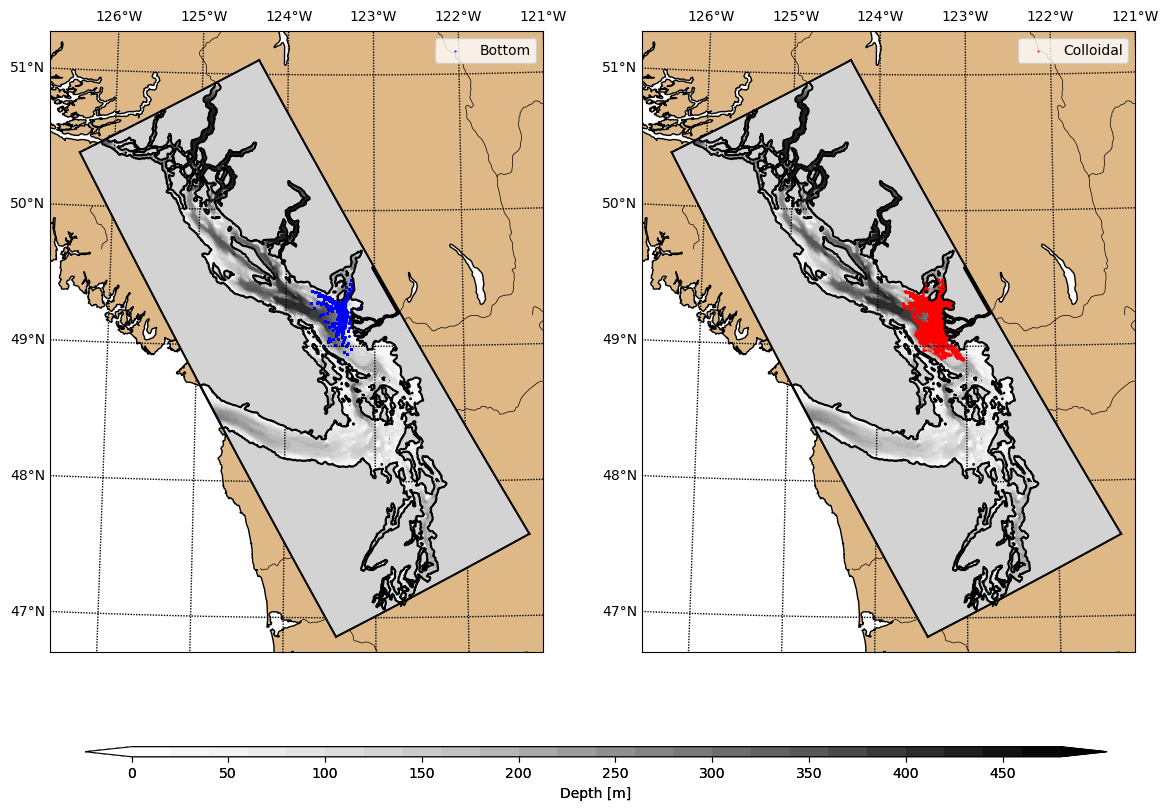

In [6]:
fig, ax = plt.subplots(1,2,figsize = (14,10))
plot_nice_plot(figure = fig, plot_axis = ax[0], data_lon=data.lon.where(data.status == 4), data_lat=data.lat.where(data.status == 4), size = 1, color_particle = 'b', label_particle='Bottom')
plot_nice_plot(figure = fig, plot_axis = ax[1], data_lon=data.lon.where(data.status == 2), data_lat=data.lat.where(data.status == 2), size = 1, color_particle = 'r', label_particle='Colloidal')


In [ ]:
jjii = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/grid_from_lat_lon_mask999.nc')

In [ ]:
def finder(lati,loni):
    j = [jjii.jj.sel(lats=lati, lons=loni, method='nearest').item()][0]
    i = [jjii.ii.sel(lats=lati, lons=loni, method='nearest').item()][0]
    return j,i